In [1]:
import warnings
warnings.filterwarnings('ignore')

# Visualization

The primary data visualization library in Python is `matplotlib`, a project begun in the early 2000s, that was built to mimic the plotting capabilities from Matlab.

Matplotlib is enormously capable of plotting most things you can imagine and it gives its users tremendous power to control every aspect of the plotting surface. 

That said, it isn't quite the friendliest library for beginners to grasp. Instead we have the following two choices:

* pandas: makes visualizing data very easy for us and usually plots what we want with a single call to the `plot` method.

* Seaborn Seaborn makes beautiful plots very easily and allows for the creation of many new types of plots that are not available directly from matplotlib or pandas. It accepts pandas DataFrame objects in its plotting functions.

Although it is possible to create plots without ever directly running any matplotlib code, from time to time it will be necessary to use it to tweak finer plot details manually. Fort this reason it is a good idea to start with a basic review of matplotlib.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [17]:
x = [1,5,7]
y = [8,9,10]

### The matplotlib object hierarchy

“Matplotlib uses a hierarchy of objects to display all of its plotting items in the output. This hierarchy is key to understanding everything about matplotlib.”

The `Figure` object is at the top of the hierarchy. It is the container for everything else that will be plotted

In [15]:
plt.figure(figsize=(12,8));

<Figure size 864x576 with 0 Axes>

Contained within the Figure is one or more **Axes** object(s). The Axes is the primary object that you will interact with when using matplotlib and can be more commonly thought of as the actual plotting surface. The Axes contains the x/y axis, points, lines, markers, labels, legends, and any other useful item that is plotted.

**Note:** the Axes object is not the plural of axis, but instead the object that creates and controls most of the useful plotting elements.

The plotting elements created by an Axes object are called **artists**.

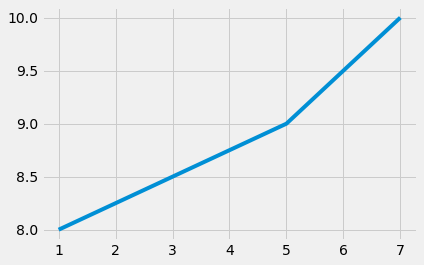

In [19]:
plt.plot(x,y);

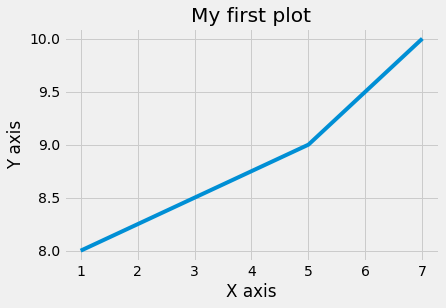

In [26]:
plt.plot(x,y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('My first plot');

# Import the cleaned data

In [67]:
import pandas as pd
df = pd.read_csv('activities_clean.csv', index_col=0)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,commute,time_min
date,,,,,,,
2018-05-21,19.67,131.7,51.69,1414.0,Ride,False,203
2018-05-20,25.01,127.8,133.13,2280.0,Ride,False,377
2018-05-19,24.67,136.4,108.42,1950.0,Ride,False,279
2018-05-18,24.32,135.3,59.02,937.0,Ride,False,158
2018-05-17,26.83,117.7,23.83,122.0,Ride,False,55


# Categorical variables

For categorical variables we are must interested in the number of variables of each kind. We can quick get a plot of this using the `seaborn.countplot()` function. A countplot is a histogram across a categorical varable, instead of a quantitative variables.

This function returns a matplotlib Axes object.

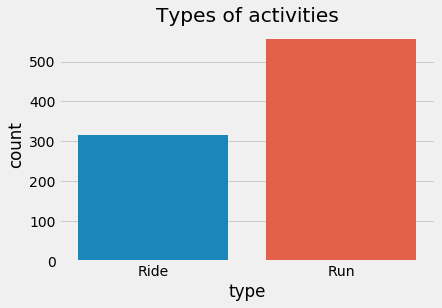

In [68]:
sns.countplot(df['type'])
plt.title('Types of activities');

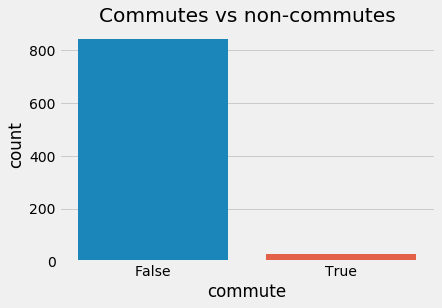

In [69]:
sns.countplot(df['commute'])
plt.title('Commutes vs non-commutes');

A useful parameter of many Seaborn functions is the `hue` parameter. This lets us specify an additional variable of the DataFrame to separate across

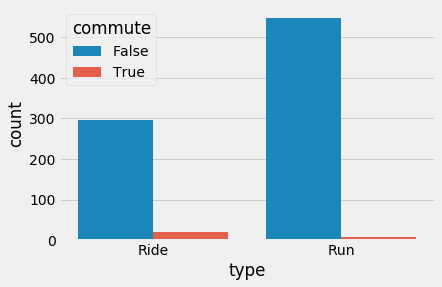

In [70]:
sns.countplot(x=df['type'], data=df, hue='commute');

# Quantitative variables

For quantitative variables that are two main types of plots that we are intersted in seeing right away:

* histograms for seeing the distribution of values of each variable
* scatter plots for seeing relationships between variables

Seaborn has a function `pairplot()` that lets us get all these plots at once

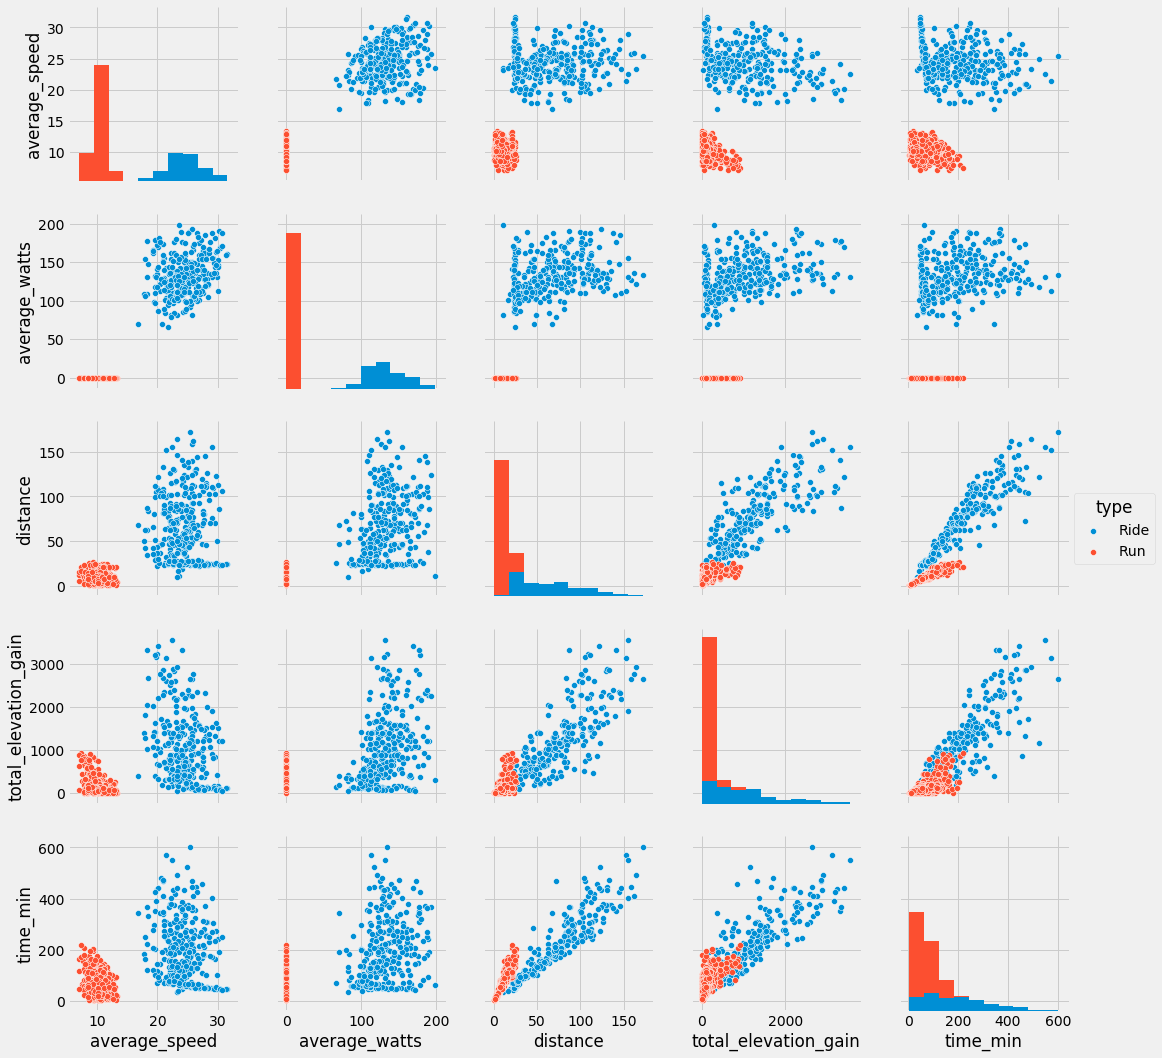

In [71]:
col_num = ['average_speed', 'average_watts','distance','total_elevation_gain', 'time_min']
sns.pairplot(x_vars=col_num, y_vars=col_num, hue='type', data=df, size=3);

# Trends

Let's investigate some trends in training time. In particular let's plot the average training time per day of the week, month of the year, and year.

To start we define a copy of the DataFrame since we will make some modifications to it

In [113]:
trends = df.copy()|

Let's first make sure taht we have the DateTimeIndex as our index

In [114]:
trends.index

Index(['2018-05-21', '2018-05-20', '2018-05-19', '2018-05-18', '2018-05-17',
       '2018-05-17', '2018-05-16', '2018-05-15', '2018-05-12', '2018-05-05',
       ...
       '2013-10-12', '2013-10-05', '2013-09-29', '2013-08-05', '2013-07-13',
       '2013-07-06', '2013-06-24', '2013-06-16', '2013-06-15', '2013-06-01'],
      dtype='object', name='date', length=872)

It seems that we have to conver it again

In [122]:
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)

To investigate the weekday trends we need to map each date to a day of the week. Luckily we can use the `weekday` attribute of the DateTimeIndex object directly 

In [116]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)
trends.head()

,average_speed,average_watts,distance,total_elevation_gain,type,commute,time_min,weekday
date,,,,,,,,
2018-05-21,19.67,131.7,51.69,1414.0,Ride,False,203,0
2018-05-20,25.01,127.8,133.13,2280.0,Ride,False,377,6
2018-05-19,24.67,136.4,108.42,1950.0,Ride,False,279,5
2018-05-18,24.32,135.3,59.02,937.0,Ride,False,158,4
2018-05-17,26.83,117.7,23.83,122.0,Ride,False,55,3


Now we group the entries according to the weekday and we obtain the mean values

In [117]:
trends.groupby('weekday').mean()

,average_speed,average_watts,distance,total_elevation_gain,commute,time_min
weekday,,,,,,
0,14.644458,43.059036,26.013855,388.139759,0.024096,104.481928
1,13.597043,27.415652,15.911043,204.612174,0.043478,64.391304
2,14.511224,33.214286,17.443197,206.178231,0.054422,80.163265
3,16.286415,54.158491,28.750252,376.956604,0.050314,97.842767
4,15.304153,47.341525,29.533983,455.994915,0.042373,111.508475
5,16.752385,62.833846,45.016923,694.701538,0.007692,159.123077
6,16.308417,63.465833,49.925583,816.113333,0.000000,184.566667


And now it remains to plot them. We will use the pandas `plot()` which we will call on the `time_min` column of the grouped object.

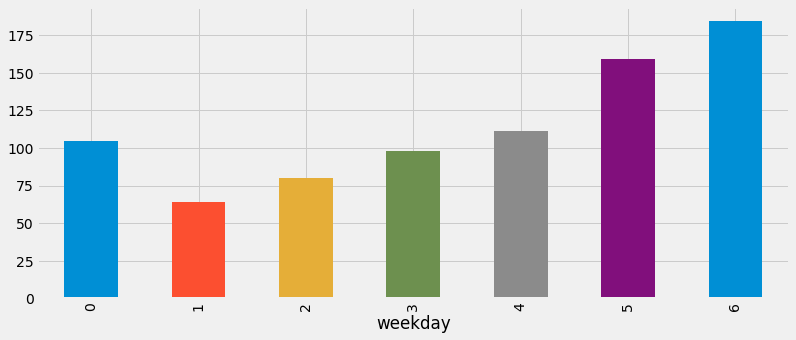

In [118]:
trends.groupby('weekday').mean()['time_min'].plot(kind='bar', figsize=(12,5));

There are some steps we can take to improve this plot
* define the x-labels to be the actual names of the days
* add titles and labels

To make these modifications we use the fact that the pandas `plot` function returns a matplotlib Axes object, so we can use matplotlib functions to modify the plot.

Here is a quick way to get the weekday names:

In [119]:
import calendar
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

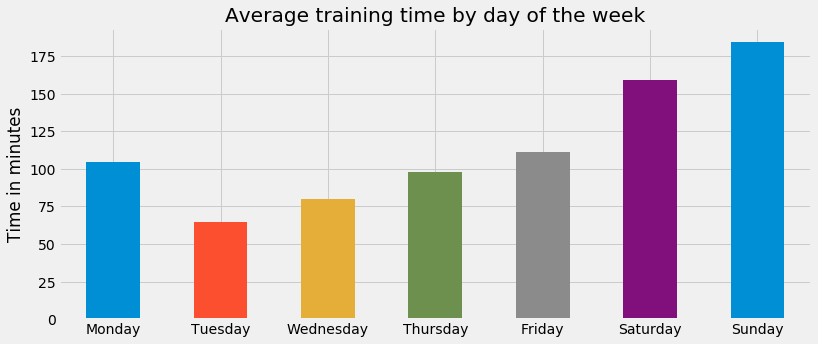

In [120]:
trends.groupby('weekday').mean()['time_min'].plot(kind='bar', figsize=(12,5));
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal');
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by day of the week');

# Exercise: 

Obtain a similar plot for the months of the year

In [104]:
trends['month'] = trends.index.map(lambda x: x.month)
trends_month = trends.groupby('month').mean()
trends_month

,average_speed,average_watts,distance,total_elevation_gain,commute,time_min,weekday
month,,,,,,,
1,11.558209,12.332836,15.903582,205.626866,0.059701,75.731343,3.432836
2,15.221081,48.882432,29.723514,407.629730,0.067568,107.081081,3.094595
3,15.573298,44.197872,29.356915,350.737234,0.042553,107.340426,3.234043
4,16.901087,59.846739,36.784348,548.081522,0.032609,130.652174,3.239130
5,16.336422,54.733945,32.161743,511.377982,0.018349,114.376147,3.100917
6,16.516901,58.161972,41.157887,570.021127,0.000000,148.169014,3.197183
7,17.532877,67.664384,35.332466,552.128767,0.068493,124.178082,3.054795
8,16.724429,60.958571,31.327571,445.922857,0.028571,117.585714,2.671429
9,18.121774,75.203226,41.959516,658.427419,0.016129,143.693548,3.225806


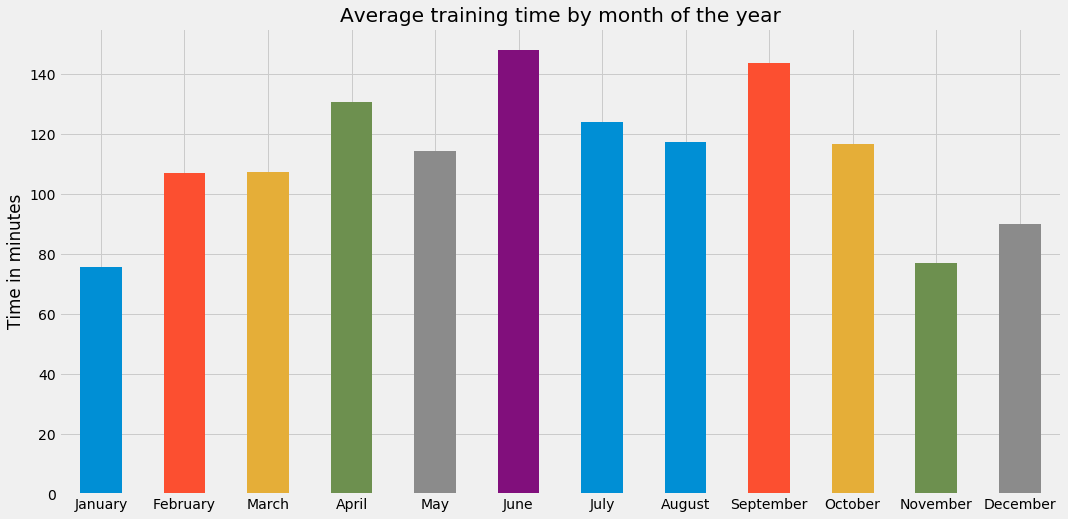

In [112]:
trends_month['time_min'].plot(kind='bar', figsize=(16,8));
plt.xticks(list(range(12)), list(calendar.month_name)[1:], rotation='horizontal');
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by month of the year');

# Grouping by multiple variables

Let's now obtain a similar plot to the ones above but for the average training time per year but this time we will divide the charts to distinguish between the different activity types.

In [124]:
trends['year'] = trends.index.map(lambda x: x.year)

Let's start by grouping by both `year` and `type`

In [133]:
grouped = trends.groupby(['year', 'type']).mean()
grouped

average_speed  average_watts   distance  total_elevation_gain  \
year type                                                                  
2013 Run       10.365714       0.000000  10.461429             85.914286   
2014 Run       10.447674       0.000000   7.549186             53.977907   
2015 Ride      16.850000      70.300000  67.720000            377.300000   
     Run       10.453631       0.000000   9.265363             82.129050   
2016 Ride      23.302167     131.260833  62.860417            918.641667   
     Run        9.855897       0.000000  11.568590            173.241026   
2017 Ride      25.062387     134.067097  64.979548           1061.778710   
     Run       10.036567       0.000000  13.910448            240.144776   
2018 Ride      25.631000     124.725000  81.368250           1158.077500   
     Run       10.108696       0.000000  12.550870            255.191304   

            commute    time_min  
year type                        
2013 Run   0.000000   66.071429  
2014 Run   0.000000   49.284884  
2015 Ride  0.000000  343.000000  
     Run   0.000000   63.307263  
2016 Ride  0.000000  191.716667  
     Run   0.025641   85.448718  
2017 Ride  0.116129  191.058065  
     Run   0.044776   96.552239  
2018 Ride  0.050000  220.000000  
     Run   0.086957   82.152174

This is looking promising! Let's see what happens when we select the column we are interested in 

In [134]:
grouped['time_min']

year  type
2013  Run      66.071429
2014  Run      49.284884
2015  Ride    343.000000
      Run      63.307263
2016  Ride    191.716667
      Run      85.448718
2017  Ride    191.058065
      Run      96.552239
2018  Ride    220.000000
      Run      82.152174
Name: time_min, dtype: float64

Ok so these are the values that we want to plot, but now how to obtain the plot? If we try the same thing as before

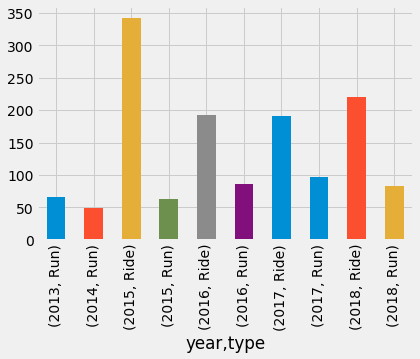

In [136]:
grouped['time_min'].plot(kind='bar');

This is not exactly what we want. This is because the panda `plot()` function always plots against the index, and here we have a multiple index. But what we want is to plot against the year, but just distinguish between `rides` and `runs`.

So let's try resetting the index to be just according to the year. 

In [137]:
grouped['time_min'].unstack('type')

type,Ride,Run
year,,
2013,NaN,66.071429
2014,NaN,49.284884
2015,343.000000,63.307263
2016,191.716667,85.448718
2017,191.058065,96.552239
2018,220.000000,82.152174


Ok, this is looking like what we want. But there is one more problem: in the years 2013 and 2014 we have no registered ride activities, which caused pandas to fill these values with NaN. However we cannot plot NaN values so let's set these equal to 0 instead

In [139]:
result = grouped['time_min'].unstack('type').fillna(0)
result

type,Ride,Run
year,,
2013,0.000000,66.071429
2014,0.000000,49.284884
2015,343.000000,63.307263
2016,191.716667,85.448718
2017,191.058065,96.552239
2018,220.000000,82.152174


Perfect! Now we should be able to plot this data use the `stacked` parameter provided by the pandas `plot` method to seperate between the `Ride` and `Run` columns

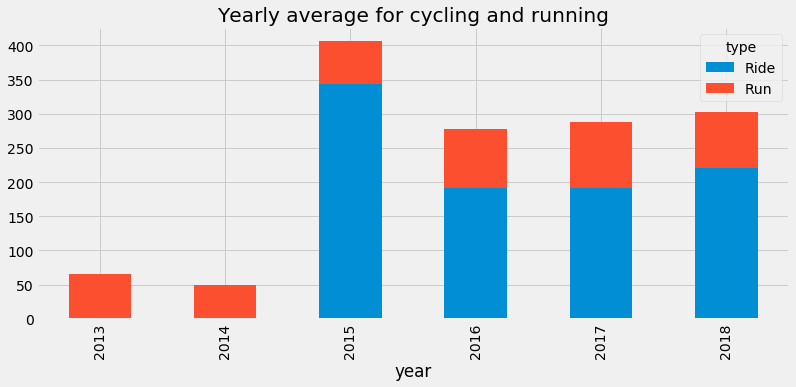

In [145]:
result.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title('Yearly average for cycling and running');

Another useful type of visualization is the correlation plot

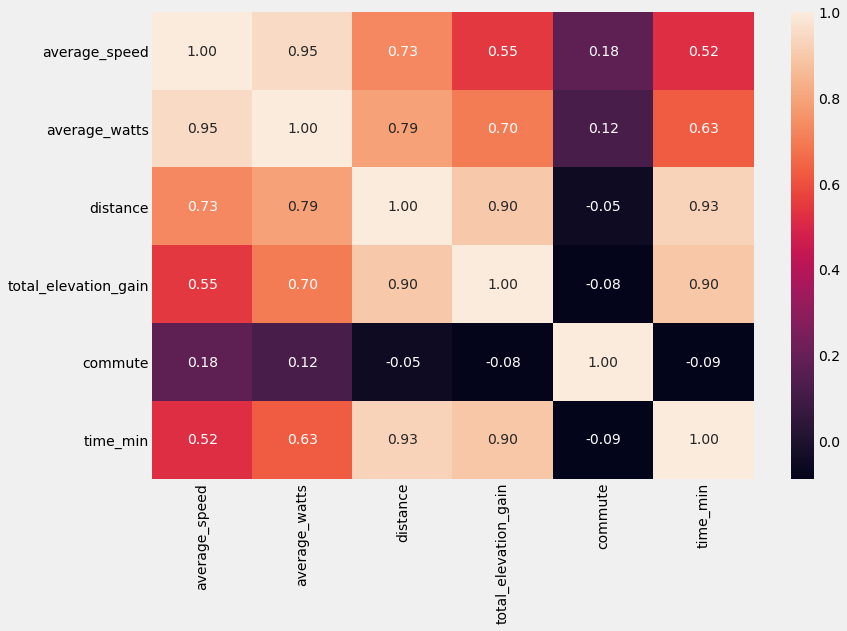

In [154]:
corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

We can see that `distance` and `time_min` are heavily correlated. We can explore their relationship further using a regression plot that plots a line of best fit.

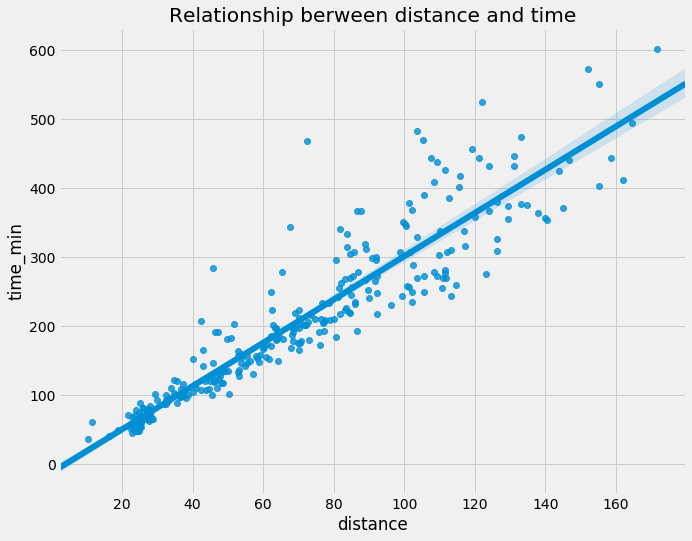

In [158]:
plt.figure(figsize = (10,8))
sns.regplot(x="distance", y="time_min", data=df_rides)
plt.title('Relationship berween distance and time');